# Stochastic Gradient Descent - SGD
## https://pytorch.org/docs/stable/generated/torch.optim.SGD.html

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [32]:
# Definindo um dataset simples
torch.manual_seed(42)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(3) + 0.1 * torch.randn(x.size())

In [33]:
import numpy as np

x_flattened = x.flatten()
print(np.array(x_flattened))

[-1.   -0.98 -0.96 -0.94 -0.92 -0.9  -0.88 -0.86 -0.84 -0.82 -0.8  -0.78
 -0.76 -0.74 -0.72 -0.7  -0.68 -0.66 -0.64 -0.62 -0.6  -0.58 -0.56 -0.54
 -0.52 -0.49 -0.47 -0.45 -0.43 -0.41 -0.39 -0.37 -0.35 -0.33 -0.31 -0.29
 -0.27 -0.25 -0.23 -0.21 -0.19 -0.17 -0.15 -0.13 -0.11 -0.09 -0.07 -0.05
 -0.03 -0.01  0.01  0.03  0.05  0.07  0.09  0.11  0.13  0.15  0.17  0.19
  0.21  0.23  0.25  0.27  0.29  0.31  0.33  0.35  0.37  0.39  0.41  0.43
  0.45  0.47  0.49  0.52  0.54  0.56  0.58  0.6   0.62  0.64  0.66  0.68
  0.7   0.72  0.74  0.76  0.78  0.8   0.82  0.84  0.86  0.88  0.9   0.92
  0.94  0.96  0.98  1.  ]


In [34]:
import numpy as np

# Convertendo para numpy e formatando a saída com 2 casas decimais
np.set_printoptions(precision=2, suppress=True)

y_flattened = y.flatten()
print(np.array(y_flattened))

[-0.81 -0.79 -0.79 -1.04 -0.71 -0.85 -0.68 -0.79 -0.66 -0.38 -0.55 -0.61
 -0.51 -0.46 -0.45 -0.26 -0.15 -0.3  -0.31 -0.19 -0.29 -0.08 -0.09  0.01
 -0.01  0.01 -0.05  0.04 -0.11 -0.07 -0.09  0.03 -0.18 -0.12 -0.05  0.15
  0.01 -0.06  0.02 -0.09 -0.16  0.09 -0.09 -0.06 -0.13  0.21 -0.12 -0.05
 -0.09 -0.07  0.01  0.05 -0.05  0.12 -0.08 -0.07 -0.14  0.01 -0.    0.07
 -0.    0.2  -0.1   0.16  0.17  0.12  0.26  0.1   0.09  0.04 -0.03  0.21
  0.08  0.16  0.13  0.18  0.21  0.11 -0.03  0.14  0.24  0.22  0.15  0.25
  0.4   0.43  0.51  0.39  0.4   0.57  0.57  0.55  0.66  0.81  0.73  0.75
  0.73  0.9   0.98  1.06]


In [37]:
# Definindo um modelo simples de rede neural (uma camada linear)
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.hidden = nn.Linear(1, 10)
        self.predict = nn.Linear(10, 1)

    def forward(self, x):
        #print('x1', x)
        x = torch.relu(self.hidden(x))
        #print('x2', x)
        return self.predict(x)

In [38]:
# Função para treinar o modelo
def train_model(model, optimizer, criterion, x, y, epochs=100):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()  # Zera os gradientes
        outputs = model(x)     # Forward pass
        loss = criterion(outputs, y)  # Calcula o erro
        loss.backward()        # Backward pass
        optimizer.step()       # Atualiza os parâmetros
        losses.append(loss.item())
    return losses

# Comparando as duas otimizações: Nesterov e sem Nesterov (Sutskever)
def compare_optimizers():
    # Definir modelo e critério de perda (MSELoss para regressão)
    model_nesterov = SimpleNet()
    model_sutskever = SimpleNet()
    criterion = nn.MSELoss()

    # SGD sem Nesterov (padrão de Sutskever)
    optimizer_sutskever = optim.SGD(model_sutskever.parameters(), lr=0.01, momentum=0.9, nesterov=False)
    
    # SGD com Nesterov
    optimizer_nesterov = optim.SGD(model_nesterov.parameters(), lr=0.01, momentum=0.9, nesterov=True)

    # Treinando ambos os modelos
    losses_sutskever = train_model(model_sutskever, optimizer_sutskever, criterion, x, y)
    losses_nesterov = train_model(model_nesterov, optimizer_nesterov, criterion, x, y)

    # Plotando os resultados
    plt.plot(losses_sutskever, label='SGD (Sutskever)')
    plt.plot(losses_nesterov, label='SGD (Nesterov)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('SGD: Sutskever vs Nesterov')
    plt.legend()
    plt.show()

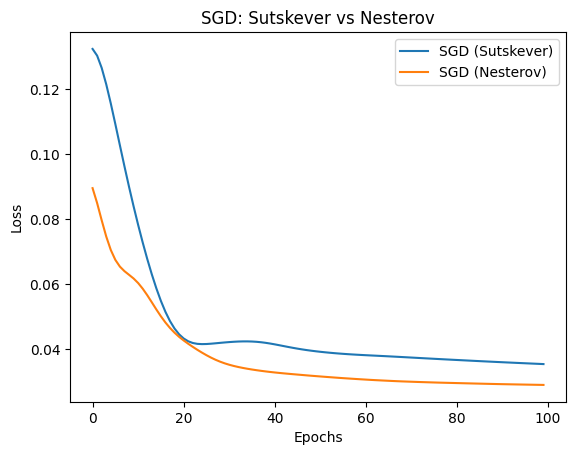

In [39]:
# Rodando a comparação
compare_optimizers()